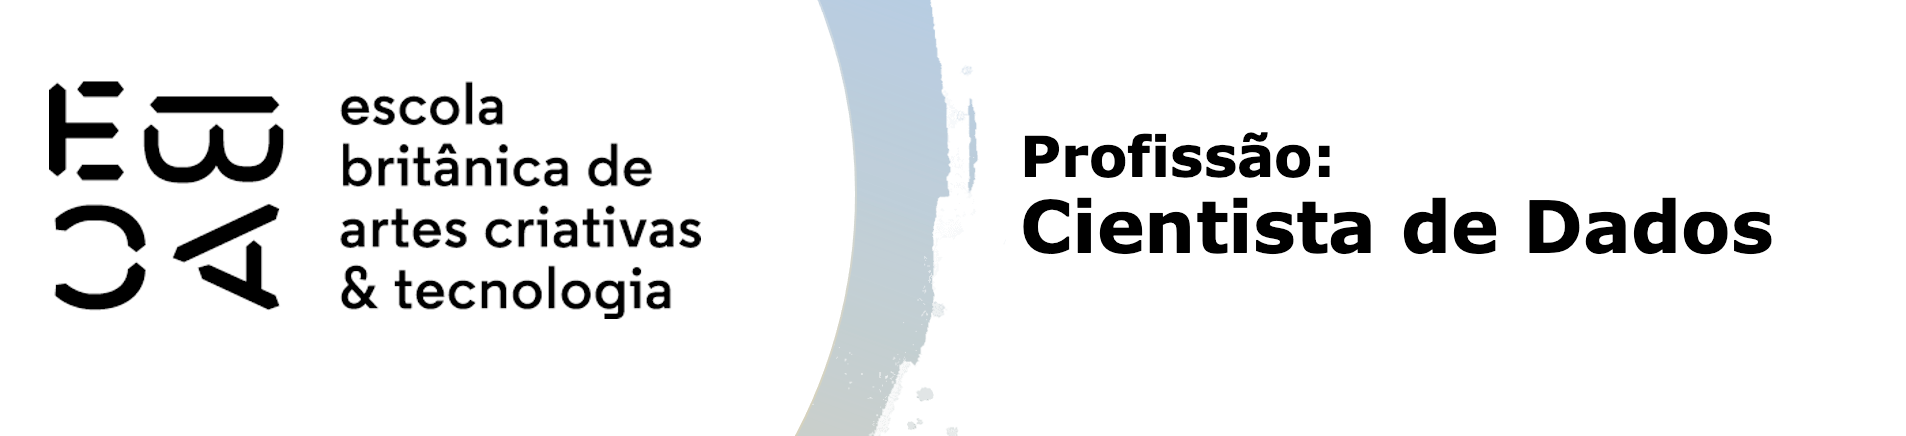

# Regressão III - Tarefa

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api  as sm
import statsmodels.formula.api as smf
import patsy
import warnings;   warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [111]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [112]:
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [113]:
df['tempo_emprego_mean'] = df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean())
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
tempo_emprego_mean            0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [114]:
# Transformando em datetime
df.index = pd.to_datetime(df.index)

# Ordenando o DataFrame pelo índice de data
df = df.sort_index()

# Definindo o ponto de corte para os três últimos meses
cutoff_date = df.index.max() - pd.DateOffset(months=3)

# Separando a base holdout (os três últimos meses)
df_holdout = df[df.index > cutoff_date]

# Extrair os nomes dos meses do holdout
meses_holdout = df_holdout.index.to_period('M').unique().astype(str).tolist()

meses_holdout

['2016-01', '2016-02', '2016-03']

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [115]:
df_train = df[~df.index.isin(df_holdout.index)].copy()

modelo = smf.ols(formula='np.log(renda) ~ tempo_emprego_mean', data=df_train).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:32:13   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.2780      0.002   4262.716      0.000       8.274       8.282
tempo_emprego_mean     0.1292      0.000    655.629      0.000       0.129       0.130
==============================================================================
Omnibus:                      798.953   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.227
Skew:                          -0.046   Prob(JB):                    1.80e-156
Kurtosis:                       2.857   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
print(f'O R² ajustado é: {modelo.rsquared_adj:.2%}')

O R² ajustado é: 41.74%


Um R² ajustado de 41.74% indica que o modelo tem uma capacidade moderada a alta de explicar a variabilidade nos dados.

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

    tempo_emprego_cat  qtd_observacoes  media_log_renda  media_tempo_emprego
0                 0.0            31431         8.139345             0.464824
1                 1.0            31240         8.180698             0.971949
2                 2.0            31075         8.297551             1.503362
3                 3.0            31434         8.331527             2.059085
4                 4.0            31106         8.438862             2.719654
5                 5.0            31133         8.520619             3.356773
6                 6.0            31512         8.620498             3.931099
7                 7.0            30808         8.672569             4.454261
8                 8.0            31291         8.711096             5.006890
9                 9.0            31657         8.879386             5.718049
10               10.0            30733         8.903218             6.409617
11               11.0            31202         9.002035             7.067073

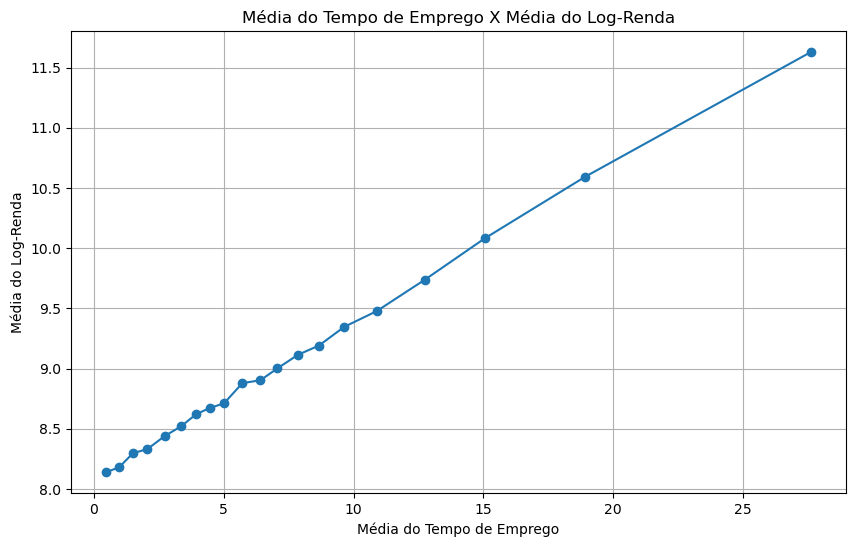

In [117]:
# Categorizando a variável 'tempo_emprego' em 20 quantis
df['tempo_emprego_cat'] = pd.qcut(df['tempo_emprego'], 20, labels=False)

# Criando a tabela de perfil
profile_table = df.groupby('tempo_emprego_cat').agg(
    qtd_observacoes=('tempo_emprego', 'size'),
    media_log_renda=('renda', lambda x: np.mean(np.log(x))),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

# Exibindo a tabela de perfil
print(profile_table)

# Gerando o gráfico da média do tempo de emprego pela média do log-renda
plt.figure(figsize=(10, 6))
plt.plot(profile_table['media_tempo_emprego'], profile_table['media_log_renda'], marker='o')
plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log-Renda')
plt.title('Média do Tempo de Emprego X Média do Log-Renda')
plt.grid(True)
plt.show()



Apesar do gráfico acima apresentar algumas conclusões como a tendência linear constante entre as variáveis observadas. O método Lowess poderia ser o método mais eficaz devido à sua capacidade de se ajustar ao formato exponencial.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [118]:
df_train.reset_index(drop=True, inplace=True)
df_train['renda_log'] = np.log(df_train['renda'])

In [119]:
df_train['cat_renda'], retbins = pd.qcut(x=df_train.renda, q=20, retbins=True, precision=0)
df_train

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_mean,renda_log,cat_renda
0,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,16.717808,9.318131,"(9966.0, 11497.0]"
1,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,9.600000,7.793508,"(1689.0, 2449.0]"
2,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,8.208219,9.528769,"(13339.0, 15536.0]"
3,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,1.301370,7.767196,"(1689.0, 2449.0]"
4,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,1.254795,6.673020,"(140.0, 1689.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,4.441096,7.546103,"(1689.0, 2449.0]"
599996,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,2.345205,8.032841,"(2449.0, 3163.0]"
599997,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,0.736986,8.543095,"(4671.0, 5519.0]"
599998,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25,6.791781,9.925701,"(18368.0, 22081.0]"


In [120]:
df_cat = (df_train.groupby(by='cat_renda')
           .agg({'cat_renda':['count'], 
                 'tempo_emprego': ['mean'], 
                 'renda_log': ['mean']})
           .droplevel(level=0, axis=1))

df_cat

,count,mean,mean
cat_renda,,,
"(140.0, 1689.0]",30000,2.828320,7.010163
"(1689.0, 2449.0]",30003,3.468372,7.632577
"(2449.0, 3163.0]",29998,3.931181,7.936228
"(3163.0, 3891.0]",30004,4.253151,8.165258
"(3891.0, 4671.0]",30002,4.589883,8.359802
"(4671.0, 5519.0]",29998,4.807133,8.533222
"(5519.0, 6458.0]",29998,5.104199,8.695236
"(6458.0, 7488.0]",29999,5.371974,8.846803
"(7488.0, 8648.0]",29998,5.665605,8.992746


In [121]:
# Resolvendo dados ausentes
df_train['tempo_emprego_fillna_2'] = (df_train['tempo_emprego']
                                      .fillna(value=df_train.merge(right=df_cat, how='left', left_on='cat_renda', right_index=True)['tempo_emprego']))

df_train

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_mean,renda_log,cat_renda,tempo_emprego_fillna_2
0,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,16.717808,9.318131,"(9966.0, 11497.0]",16.717808
1,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,9.600000,7.793508,"(1689.0, 2449.0]",9.600000
2,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,8.208219,9.528769,"(13339.0, 15536.0]",8.208219
3,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,1.301370,7.767196,"(1689.0, 2449.0]",1.301370
4,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,1.254795,6.673020,"(140.0, 1689.0]",1.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,4.441096,7.546103,"(1689.0, 2449.0]",4.441096
599996,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,2.345205,8.032841,"(2449.0, 3163.0]",2.345205
599997,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,0.736986,8.543095,"(4671.0, 5519.0]",0.736986
599998,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25,6.791781,9.925701,"(18368.0, 22081.0]",6.791781


In [122]:
df_train['renda_log'].fillna(df_train['renda_log'].mean());
df_train['renda_log'].isna().sum()

modelo1 = smf.ols(formula='renda_log ~ tempo_emprego_fillna_2', data=df_train).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                 4.344e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:32:15   Log-Likelihood:            -6.6987e+05
No. Observations:              499269   AIC:                         1.340e+06
Df Residuals:                  499267   BIC:                         1.340e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.3281      0.002   4153.760      0.000       8.324       8.332
tempo_emprego_fillna_2     0.1292      0.000    659.086      0.000       0.129       0.130
==============================================================================
Omnibus:                      741.788   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.176
Skew:                          -0.038   Prob(JB):                    4.84e-141
Kurtosis:                       2.841   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

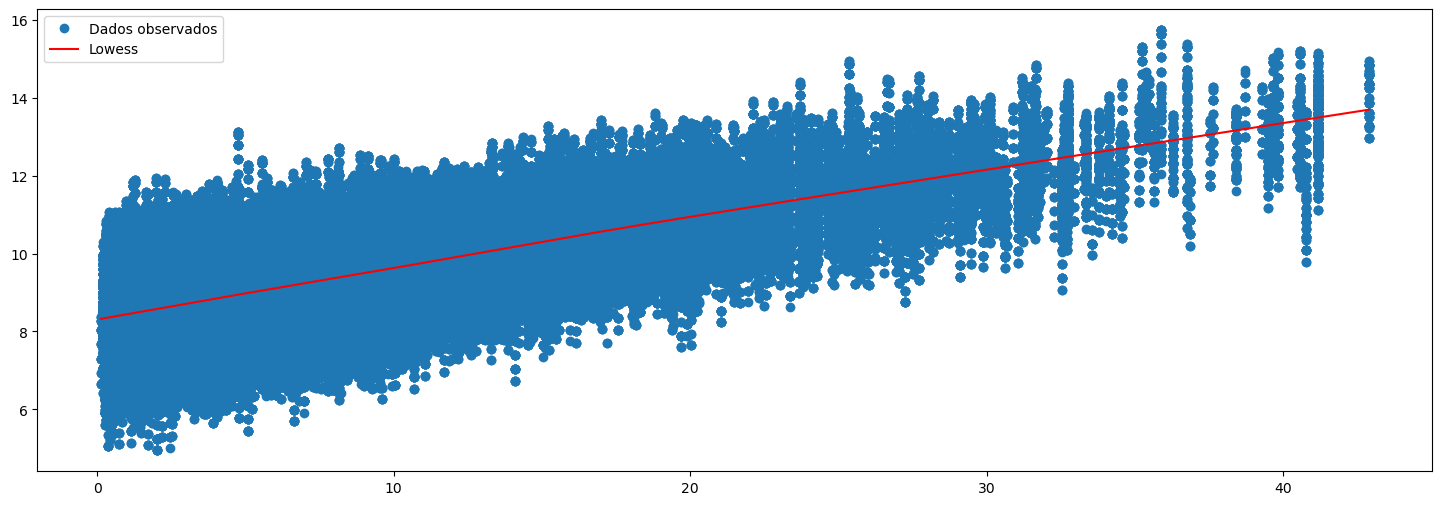

In [137]:

df_train_sorted = df_train.sort_values(by='tempo_emprego')

# Método LOWESS
lowess = sm.nonparametric.lowess(
    endog=df_train_sorted['renda_log'],
    exog=df_train_sorted['tempo_emprego'],
    frac=2/3
)

lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]

plt.figure(figsize=(18, 6))
plt.plot(df_train_sorted['tempo_emprego'], df_train_sorted['renda_log'], 'o', label='Dados observados')
plt.plot(lowess_x, lowess_y, label='Lowess', color='red')

plt.legend()
plt.show()


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [125]:
df_train_ = df_[df_.index <= df_.index.unique().max() - pd.DateOffset(months=3)].copy()  
df_test_ = df_[~df_.index.isin(df_train_.index)].copy() 

df_train_['tempo_emprego_cat'] = pd.cut(x=df_train_.tempo_emprego, bins=q)
df_test_['tempo_emprego_cat'] = pd.cut(x=df_test_.tempo_emprego, bins=q)

cat_modelo = smf.ols(formula='renda_log ~ tempo_emprego_cat', data=df_train_).fit()


print(f'''
R-quadrado ajustado do modelo: {cat_modelo.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=cat_model.predict(df_test_)):.2%}
''')



R-quadrado ajustado do modelo: 65.04%
R-quadrado com dados de teste: 70.33%



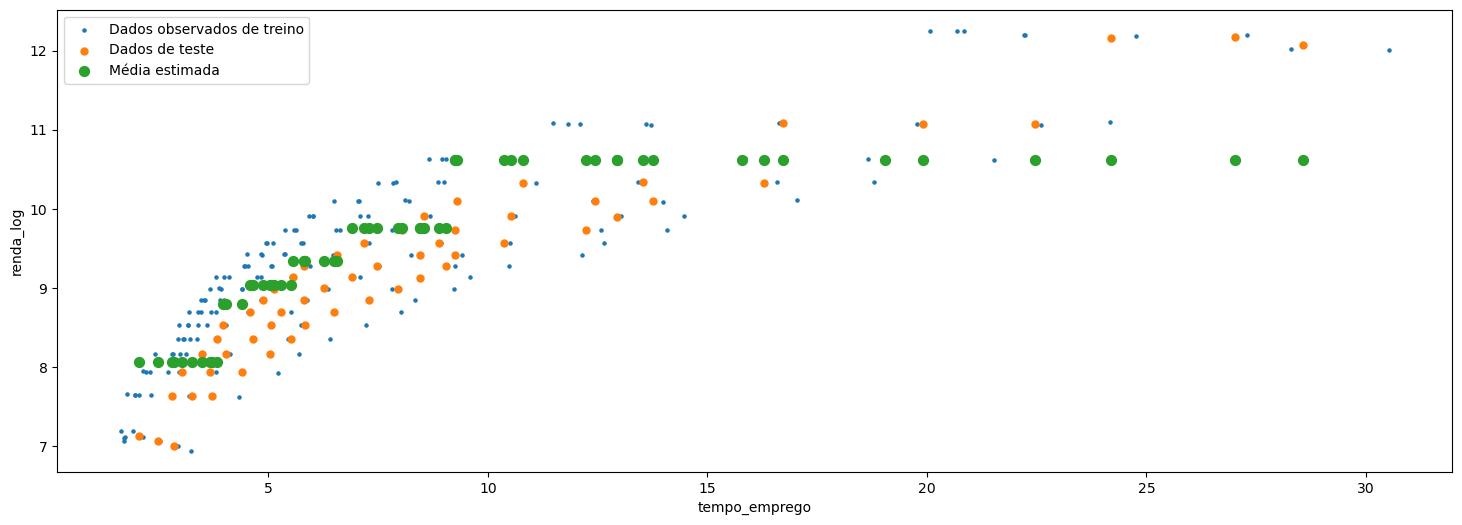

In [126]:
def plotar_resultados_teste(modelo: sm.regression.linear_model.RegressionResultsWrapper) -> None:
    
    plt.figure(figsize=(18,6))
    plt.scatter(df_train_.tempo_emprego, df_train_.renda_log, s=5, label='Dados observados de treino')
    plt.scatter(df_test_.tempo_emprego, df_test_.renda_log, s=25, label='Dados de teste')
    plt.scatter(df_test_.tempo_emprego, modelo.predict(df_test_), s=50, label='Média estimada')
    plt.xlabel(xlabel='tempo_emprego')
    plt.ylabel(ylabel='renda_log')
    plt.legend(loc=2)
    plt.show()
    

plotar_resultados_teste(modelo=cat_model)


R-quadrado ajustado do modelo: 79.54%
R-quadrado com dados de teste: 84.22%



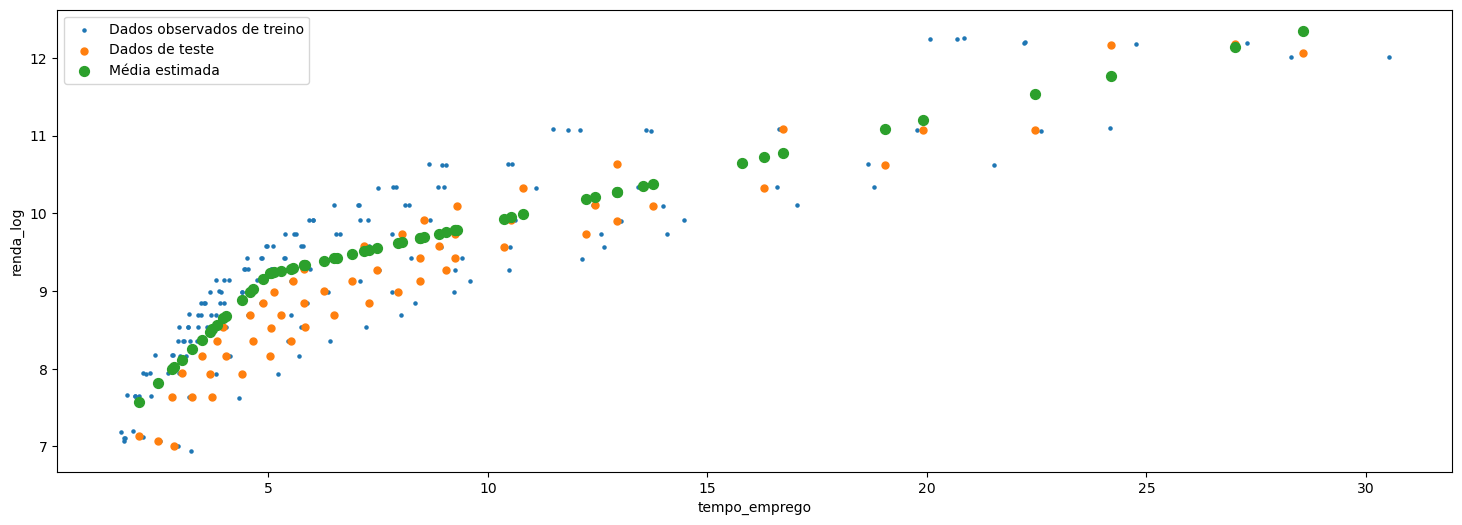

In [127]:
C1 = 5

df_train_['X_1'] = (df_train_['tempo_emprego'] <= C1) * df_train_['tempo_emprego'] + (df_train_['tempo_emprego'] >  C1) * C1
df_train_['X_2'] = (df_train_['tempo_emprego'] >  C1) * df_train_['tempo_emprego'] + (df_train_['tempo_emprego'] <= C1) * C1

df_test_['X_1'] = (df_test_['tempo_emprego'] <= C1) * df_test_['tempo_emprego'] + (df_test_['tempo_emprego'] >  C1) * C1
df_test_['X_2'] = (df_test_['tempo_emprego'] >  C1) * df_test_['tempo_emprego'] + (df_test_['tempo_emprego'] <= C1) * C1

modelo_segmentado = smf.ols(formula='renda_log ~ X_1 + X_2', data=df_train_).fit()

print(f'''
R-quadrado ajustado do modelo: {segmented_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=segmented_model.predict(df_test_)):.2%}
''')

plotar_resultados_teste(modelo=modelo_segmentado)


R-quadrado ajustado do modelo: 79.74%
R-quadrado com dados de teste: 85.10%



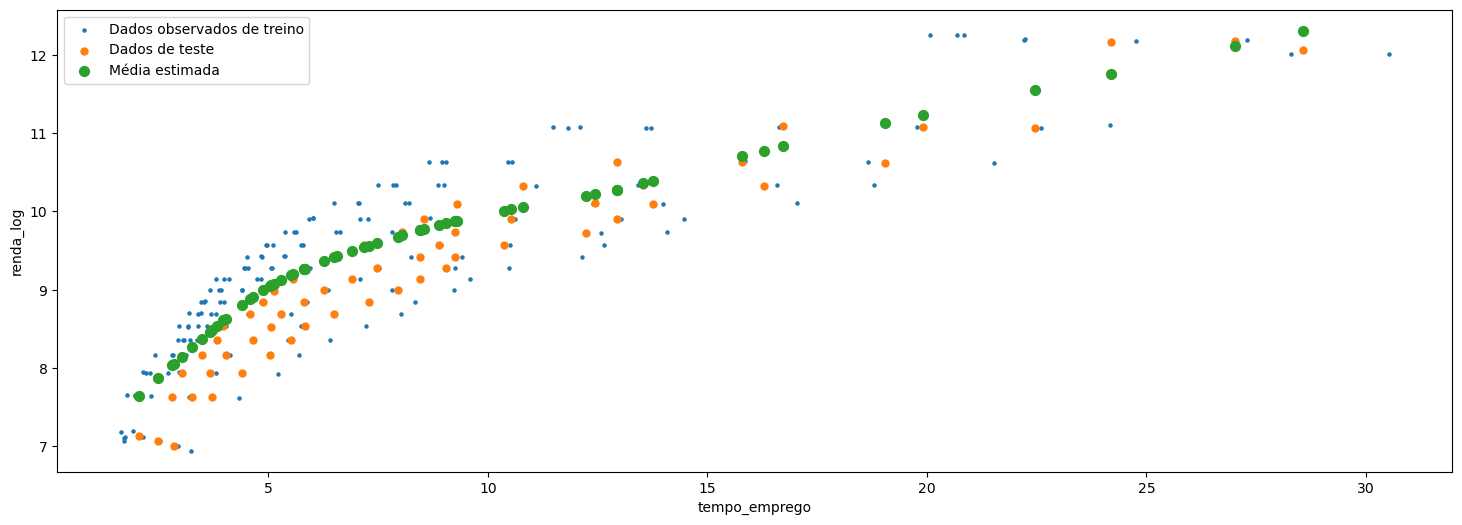

In [128]:
# Calculando LOWESS para os dados de treinamento
lowess_ = sm.nonparametric.lowess(endog=df_train_.renda_log, exog=df_train_.tempo_emprego, frac=2/3)

f_ = interp1d(x=lowess_[:,0], y=lowess_[:,1], bounds_error=False)

df_train_['lowess'] = f_(df_train_.tempo_emprego)
df_test_['lowess'] = f_(df_test_.tempo_emprego)

mod_lowess = smf.ols(formula='renda_log ~ lowess', data=df_train_).fit()

print(f'''
R-quadrado ajustado do modelo: {lowess_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=lowess_model.predict(df_test_)):.2%}
''')

plotar_resultados_teste(modelo=mod_lowess)